<a href="https://colab.research.google.com/github/janewen134/tensorflow_self_improvement/blob/master/class4/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
from matplotlib import pyplot as plt

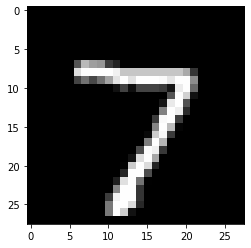

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [9]:
class MnistModel(Model):
  def __init__(self):
    super(MnistModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    y = self.d2(x)
    return y

In [10]:
model = MnistModel()

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1509 - val_sparse_categorical_accuracy: 0.9541
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1147 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9769 - val_loss: 0.0936 - val_sparse_categorical_accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0817 - val_sparse_categorical_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0801 - val_sparse_categorical_accuracy: 0.9759


In [13]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
